## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

## Read data

In [2]:
#CreditEDA_CaseStudy_Case Study
app = pd.read_csv('C:\Users\Chandana\Documents\application_data.csv')
app.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## structure of data

In [3]:
app.shape

(307511, 122)

In [4]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
app.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_18                     2
FLAG_DOCUMENT_14                     2
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE                           2
FLAG_EMAIL                           2
FLAG_DOCUMENT_15                     2
FLAG_DOCUMENT_16                     2
FLAG_DOCUMENT_17                     2
EMERGENCYSTATE_MODE                  2
REG_CITY_NOT_WORK_CITY               2
REG_CITY_NOT_LIVE_CITY               2
REG_REGION_NOT_LIVE_REGION           2
FLAG_DOCUMENT_19                     2
REG_REGION_NOT_WORK_REGION           2
FLAG_DOCUMENT_20                     2
FLAG_DOCUMENT_13                     2
TARGET                               2
NAME_CONTRACT_TYPE                   2
FLAG_DOCUMENT_2                      2
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
FLAG_DOCUMENT_3          

In [6]:
#percentage of missing values for column
missing = (app.isnull().sum() / app.isnull().count()*100).sort_values(ascending = False)
missing

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

## Data Cleaning and Manipulation

In [7]:
#drop columns with high missing value percentage(>45%)
drop_col=app[['COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_AVG','FONDKAPREMONT_MODE','LIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG','FLOORSMIN_MEDI','FLOORSMIN_MODE','FLOORSMIN_AVG','YEARS_BUILD_MEDI','YEARS_BUILD_AVG','YEARS_BUILD_MODE','OWN_CAR_AGE','LANDAREA_MODE','LANDAREA_AVG','LANDAREA_MEDI','BASEMENTAREA_MEDI','BASEMENTAREA_AVG','BASEMENTAREA_MODE','EXT_SOURCE_1','NONLIVINGAREA_MEDI','NONLIVINGAREA_AVG','NONLIVINGAREA_MODE','ELEVATORS_MODE','ELEVATORS_AVG','ELEVATORS_MEDI','WALLSMATERIAL_MODE','APARTMENTS_MODE','APARTMENTS_AVG','APARTMENTS_MEDI','ENTRANCES_MEDI','ENTRANCES_MODE','ENTRANCES_AVG','LIVINGAREA_MEDI','LIVINGAREA_MODE','LIVINGAREA_AVG','HOUSETYPE_MODE','FLOORSMAX_MODE','FLOORSMAX_MEDI','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MODE','TOTALAREA_MODE','EMERGENCYSTATE_MODE']]
app.drop(['COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_AVG','FONDKAPREMONT_MODE','LIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG','FLOORSMIN_MEDI','FLOORSMIN_MODE','FLOORSMIN_AVG','YEARS_BUILD_MEDI','YEARS_BUILD_AVG','YEARS_BUILD_MODE','OWN_CAR_AGE','LANDAREA_MODE','LANDAREA_AVG','LANDAREA_MEDI','BASEMENTAREA_MEDI','BASEMENTAREA_AVG','BASEMENTAREA_MODE','EXT_SOURCE_1','NONLIVINGAREA_MEDI','NONLIVINGAREA_AVG','NONLIVINGAREA_MODE','ELEVATORS_MODE','ELEVATORS_AVG','ELEVATORS_MEDI','WALLSMATERIAL_MODE','APARTMENTS_MODE','APARTMENTS_AVG','APARTMENTS_MEDI','ENTRANCES_MEDI','ENTRANCES_MODE','ENTRANCES_AVG','LIVINGAREA_MEDI','LIVINGAREA_MODE','LIVINGAREA_AVG','HOUSETYPE_MODE','FLOORSMAX_MODE','FLOORSMAX_MEDI','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MODE','TOTALAREA_MODE','EMERGENCYSTATE_MODE'],axis=1,inplace=True)

In [8]:
(app.isnull().sum() / app.isnull().count()*100).sort_values(ascending = False)


OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
NAME_INCOME_TYPE                0.000000
FLAG_OWN_REALTY                 0.000000
TARGET                          0.000000
FLAG_EMAIL                      0.000000
FLAG_PHONE                      0.000000
FLAG_CONT_MOBILE                0.000000
NAME_CONTRACT_TY

## impute missing values <45%

In [9]:
#OCCUPATION_TYPE has 31% null values may be the applicent occupation dosent match with the provided list so filling the null values as "others"

app.OCCUPATION_TYPE.fillna('Others', inplace = True)
app.OCCUPATION_TYPE.value_counts(normalize=True)*100


Others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

In [10]:
# Replacing missing values with median
median_value=app.AMT_REQ_CREDIT_BUREAU_QRT.median()
app.AMT_REQ_CREDIT_BUREAU_QRT.fillna(value=median_value,inplace=True)

In [11]:
# Replacing missing values with median
median_year=app.AMT_REQ_CREDIT_BUREAU_YEAR.median()
app.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(value=median_year,inplace=True)

In [12]:
# Replacing missing values with median
median_mon=app.AMT_REQ_CREDIT_BUREAU_MON.median()
app.AMT_REQ_CREDIT_BUREAU_MON.fillna(value=median_mon,inplace=True)

In [13]:
# Replacing missing values with median
median_week=app.AMT_REQ_CREDIT_BUREAU_WEEK.median()
app.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(value=median_week,inplace=True)

In [14]:
# Replacing missing values with median
median_day=app.AMT_REQ_CREDIT_BUREAU_DAY.median()
app.AMT_REQ_CREDIT_BUREAU_DAY.fillna(value=median_day,inplace=True)

In [15]:
# Replacing missing values with median
median_hour=app.AMT_REQ_CREDIT_BUREAU_HOUR.median()
app.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(value=median_hour,inplace=True)

In [16]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [17]:
(app.isnull().sum() / app.isnull().count()*100).sort_values(ascending = False)

EXT_SOURCE_3                   19.825307
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
FLAG_MOBIL                      0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL                      0.000000
OCCUPATION_TYPE                 0.000000
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
FLAG_EMP_PHONE                  0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
HOUR_APPR_PROCESS_START         0.000000
TARGET          

In [18]:
#Checking data type of all columns and correcting if any changes needed
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [19]:
app.nunique().sort_values()

REG_CITY_NOT_LIVE_CITY              2
FLAG_EMAIL                          2
FLAG_DOCUMENT_9                     2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_15                    2
FLAG_PHONE                          2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_13                    2
FLAG_CONT_MOBILE                    2
FLAG_DOCUMENT_10                    2
FLAG_EMP_PHONE                      2
FLAG_MOBIL                          2
FLAG_DOCUMEN

Summery for data type change:  as all columns has correct data type, no changes are requires


### Checking for outliers

In [20]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000

In [21]:
import warnings

warnings.filterwarnings('ignore')

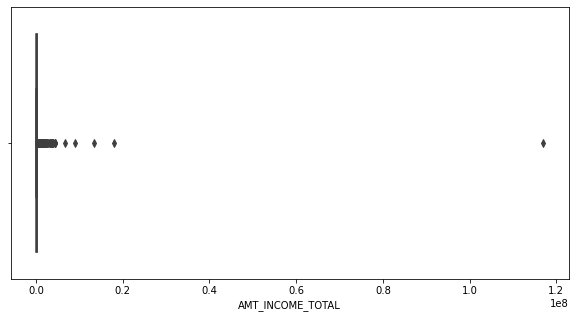

In [22]:
# outliers for AMT_INCOME_TOTAL
plt.figure(figsize=[10,5])
sns.boxplot(app.AMT_INCOME_TOTAL)
plt.show()

In [23]:
app.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [24]:
round(app.AMT_INCOME_TOTAL.describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]),2)


count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
5%       6.750000e+04
10%      8.100000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
90%      2.700000e+05
95%      3.375000e+05
99%      4.725000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

 reason: we are seeing outliers from 90% so, we can drop records >90% to make sure this doesn’t affect the analysis as we are aware of that

In [25]:
app = app[~(app.AMT_INCOME_TOTAL > 2.700000e+05)]
app.shape

(280350, 73)

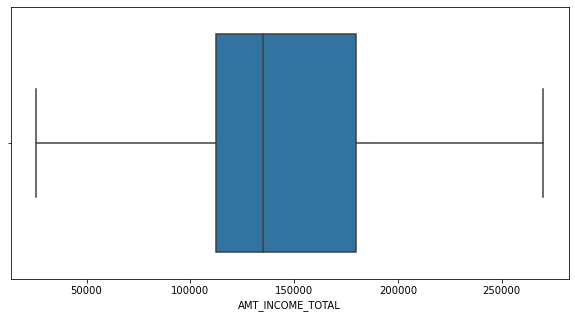

In [26]:
plt.figure(figsize=[10,5])
sns.boxplot(app.AMT_INCOME_TOTAL)
plt.show()

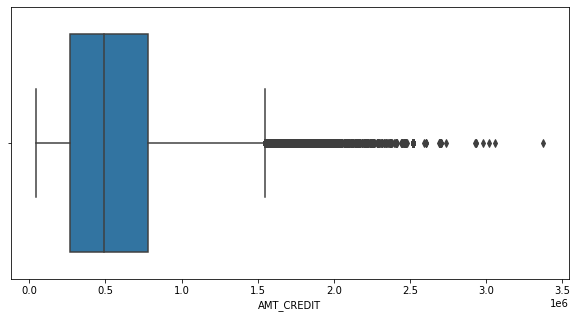

In [27]:
# Checking out liers for AMT_CREDIT
plt.figure(figsize=[10,5])
sns.boxplot(app.AMT_CREDIT)
plt.show()

In [28]:
app.AMT_CREDIT.describe()

count    2.803500e+05
mean     5.657843e+05
std      3.739153e+05
min      4.500000e+04
25%      2.700000e+05
50%      4.905360e+05
75%      7.803630e+05
max      3.375000e+06
Name: AMT_CREDIT, dtype: float64

In [29]:
app.AMT_CREDIT.quantile([.5, .7, .9, .95, 0.99,1])

0.50     490536.0
0.70     684000.0
0.90    1092519.0
0.95    1288350.0
0.99    1736937.0
1.00    3375000.0
Name: AMT_CREDIT, dtype: float64

we are seeing raise from 90% and sudden raise for max but this sounds valid if we see them have GOODS price also very close to the credit for many, so we no need to consider to remove

AMT_ANNUITY contains in previous_application we will analyse in that

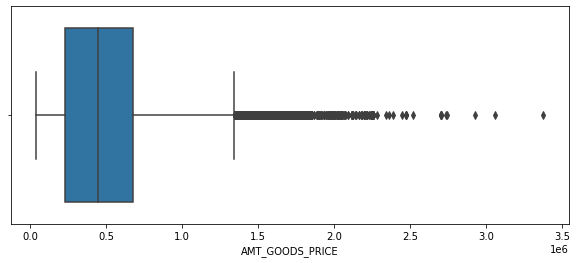

In [30]:
# checking outliers for AMT_GOODS_PRICE

plt.figure(figsize=[10,4])
sns.boxplot(app.AMT_GOODS_PRICE)
plt.show()

As we can see above AMT_GOODS_PRICE and AMT_CREDIT are relatively same so it’s reasonable to leave them

In [31]:
# checking outliers for DAYS_BIRTH
app.DAYS_BIRTH.describe()

count    280350.000000
mean     -16061.598659
std        4420.760647
min      -25201.000000
25%      -19788.000000
50%      -15777.000000
75%      -12357.250000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

### Binning 

DAYS_BIRTH column is Client's age in days at the time of application so ve are seeing negative values.
so we can add another colum as age by dividing DAYS_BIRTH by no of days of year and multipling with -1 to convert negative values

In [32]:

np.ceil(app.DAYS_BIRTH / -365)

0         26.0
1         46.0
2         53.0
3         53.0
4         55.0
          ... 
307506    26.0
307507    57.0
307508    42.0
307509    33.0
307510    47.0
Name: DAYS_BIRTH, Length: 280350, dtype: float64

In [33]:
# binning days_birth to years and filling it to AGE
app['AGE'] = np.ceil(app.DAYS_BIRTH / -365)
app.AGE.head()

0    26.0
1    46.0
2    53.0
3    53.0
4    55.0
Name: AGE, dtype: float64

In [34]:
app.AGE.describe()

count    280350.000000
mean         44.500596
std          12.109488
min          21.000000
25%          34.000000
50%          44.000000
75%          55.000000
max          70.000000
Name: AGE, dtype: float64

data look good max age is 70 which looks normal

In [35]:
# analyse DAYS_EMPLOYED
app.DAYS_EMPLOYED.describe()

count    280350.000000
mean      67070.537114
std      143900.656675
min      -17912.000000
25%       -2702.000000
50%       -1169.000000
75%        -256.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

 DAYS_EMPLOYED How many days before the application the person started current employment so binning the days to years and providing in EXPERIENCE column
it looks like similar to age column it will be more readable in years so converting days to years 

In [36]:
app['EXPERIENCE'] = np.round(app.DAYS_EMPLOYED / -365, 1)

In [37]:
app.EXPERIENCE.describe()

count    280350.000000
mean       -183.761427
std         394.261749
min       -1000.700000
25%           0.700000
50%           3.200000
75%           7.400000
max          49.100000
Name: EXPERIENCE, dtype: float64

In [38]:
# we are seeing some negative values in mean and min so lets find all -ve values
app[app.EXPERIENCE < 0].EXPERIENCE.value_counts()

-1000.7    52952
Name: EXPERIENCE, dtype: int64

 There is one record with -ve experience should not be -ve that may be having no experience but as its not explained we can standardise that to NaN

In [39]:
app.loc[app['EXPERIENCE'] < 0, 'EXPERIENCE'] = np.NaN

In [40]:
app[app.EXPERIENCE<0].EXPERIENCE.value_counts()

Series([], Name: EXPERIENCE, dtype: int64)

In [41]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

Analysing Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample, 0 - all other cases) with AGE and EXPERIENCE

## Numerical columns Analysis

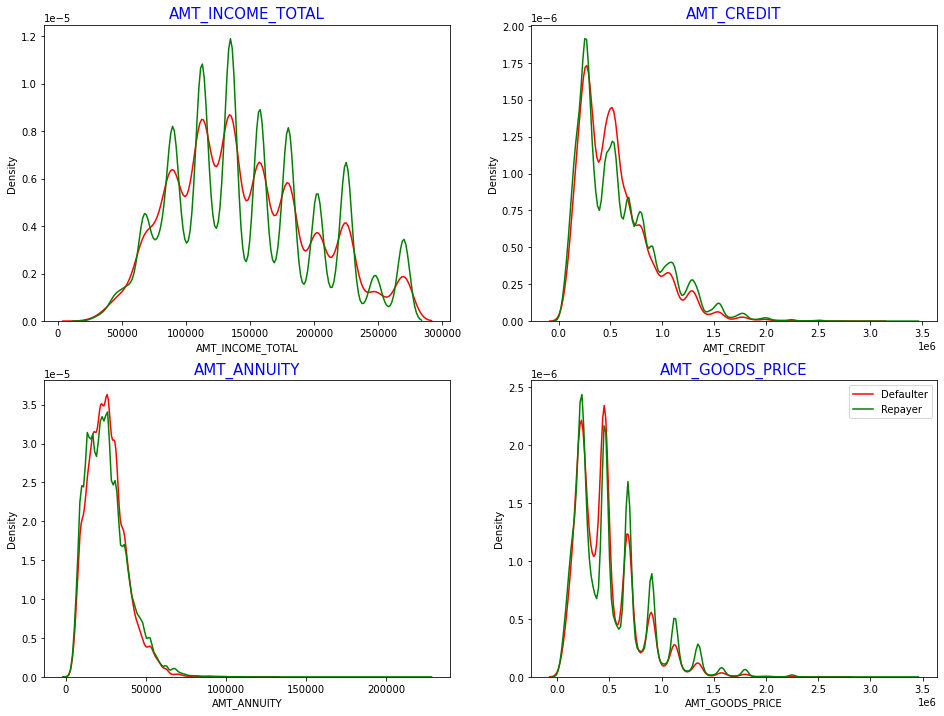

In [44]:
amount = app[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(target1[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(target0[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show()

## Summery:
Most no of loans are given for goods price below 10 lacs

Most people pay annuity below 50000 for the credit loan

Credit amount of the loan is mostly less then 10 lacs

The re-payers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision

## Numerical Bivariate Analysis

In [45]:
def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=app, 
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

<Figure size 1080x432 with 0 Axes>

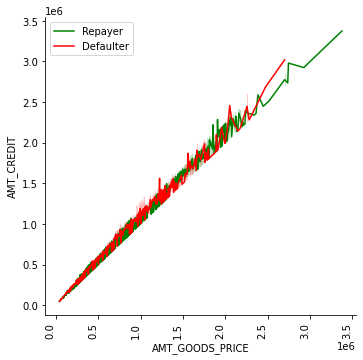

In [46]:
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',app,"TARGET", "line", ['g','r'], False,(15,6))

## summery:
When the credit amount goes beyond 3M, there is an increase in defaulters.

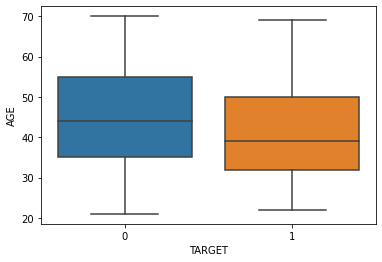

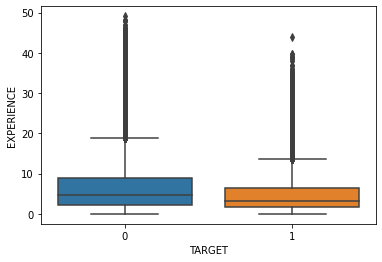

In [47]:
sns.boxplot(x="TARGET",y="AGE",data=app)
plt.show()
sns.boxplot(x="TARGET",y="EXPERIENCE",data=app)
plt.show()


## Summery:
Comparing age and loan payments, we can say that on average client who has less age(<40) are more likely to make delay in making loan payment

sill if we compare loan payment with EXPERIENCE, average of payments is mostly common but the client who has less experience are more likely to make delay in payment if we check for upper extrema and 75% of payments 

As the client gets older are get more experienced, they are more likely to repay their loans on time more often


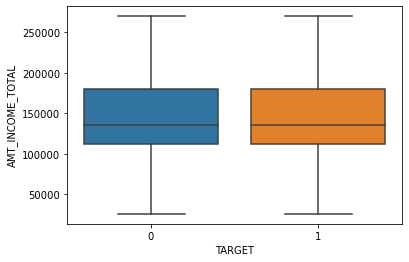

In [48]:
sns.boxplot(x="TARGET",y="AMT_INCOME_TOTAL",data=app)
plt.show()

In [49]:
app.NAME_CONTRACT_TYPE.describe()

count         280350
unique             2
top       Cash loans
freq          253633
Name: NAME_CONTRACT_TYPE, dtype: object

In [50]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

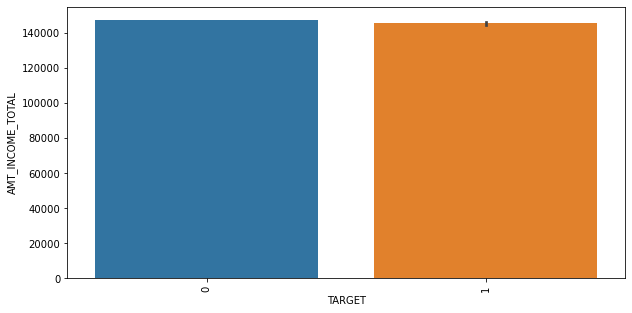

In [51]:
plt.figure(figsize=[10,5])
sns.barplot(x=app.TARGET,y=app.AMT_INCOME_TOTAL)
plt.xticks(rotation=90)
plt.show()

In [43]:
target1=app.loc[app['TARGET']==1]
target0=app.loc[app['TARGET']==0]

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

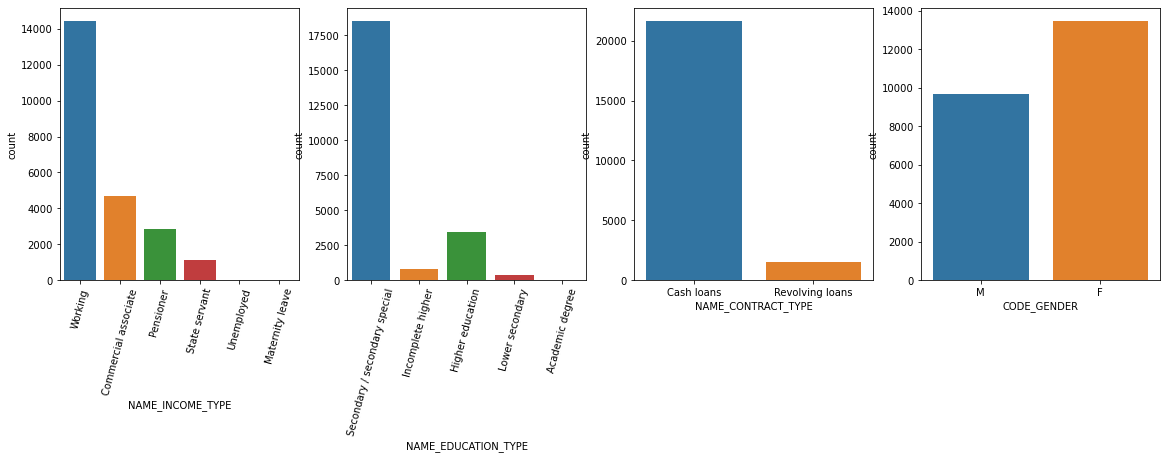

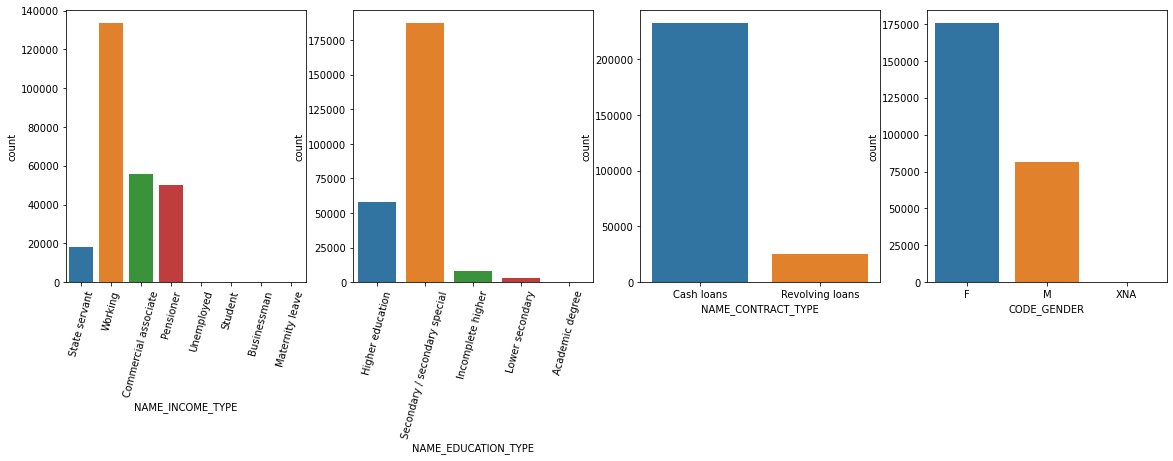

In [52]:
plt.figure(figsize=(30,5))
plt.subplot(1,6,1)
plt.xticks(rotation=75)
sns.countplot(x='NAME_INCOME_TYPE',data=target1)
plt.subplot(1,6,2)
plt.xticks(rotation=75)
sns.countplot(x='NAME_EDUCATION_TYPE',data=target1)
plt.subplot(1,6,3)
sns.countplot(x='NAME_CONTRACT_TYPE',data=target1)
plt.subplot(1,6,4)
sns.countplot(x='CODE_GENDER',data=target1)
plt.figure(figsize=(30,5))
plt.subplot(1,6,1)
plt.xticks(rotation=75)
sns.countplot(x='NAME_INCOME_TYPE',data=target0)
plt.subplot(1,6,2)
plt.xticks(rotation=75)
sns.countplot(x='NAME_EDUCATION_TYPE',data=target0)
plt.subplot(1,6,3)
sns.countplot(x='NAME_CONTRACT_TYPE',data=target0)
plt.subplot(1,6,4)
sns.countplot(x='CODE_GENDER',data=target0)

##  Summery  
    1.Type of NAME_CONTENT_TYPE doesn’t affect much while coming to loan pay, in both case there are not many differences
    2.for NAME_INCOME_TYPE with working is less likely to effect, but Pensioner are mostly paying on time
    3.checking with GENDER Female are more likely to take loan and ratio of paying on time and delaying are most like same


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

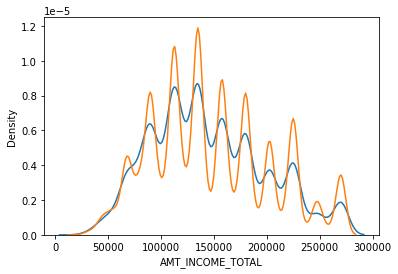

In [53]:
sns.distplot(target1['AMT_INCOME_TOTAL'],hist=False,bins=20)
sns.distplot(target0['AMT_INCOME_TOTAL'],hist=False,bins=20)

## summery
Client with AMT_INCOME_TOTAL 100000 and 150000 are more likely to delay payment

In [54]:
#Correlation between target, and prominent numeric variables
corr = app[['TARGET', 'AGE', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'CNT_FAM_MEMBERS','EXPERIENCE']].corr()
corr

,TARGET,AGE,AMT_INCOME_TOTAL,AMT_CREDIT,CNT_FAM_MEMBERS,EXPERIENCE
TARGET,1.000000,-0.081464,-0.010026,-0.022885,0.010765,-0.074739
AGE,-0.081464,1.000000,-0.093103,0.058175,-0.284012,0.353765
AMT_INCOME_TOTAL,-0.010026,-0.093103,1.000000,0.354757,0.028438,0.029675
AMT_CREDIT,-0.022885,0.058175,0.354757,1.000000,0.065068,0.091338
CNT_FAM_MEMBERS,0.010765,-0.284012,0.028438,0.065068,1.000000,-0.028099
EXPERIENCE,-0.074739,0.353765,0.029675,0.091338,-0.028099,1.000000


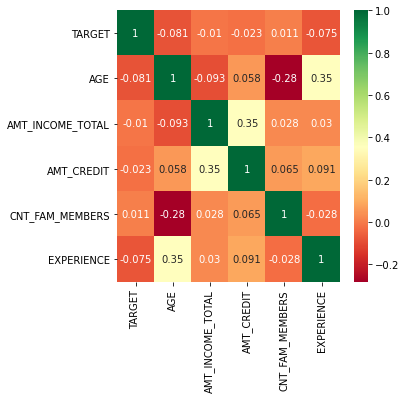

In [55]:
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True,cmap="RdYlGn")
plt.show()

## Summery
client with older age and heigh family count are more likely to delay payment as we are seeing high negative correlation 
Applicants who have higher family members have higher default rate.


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'House / apartment'),
  Text(1, 0, 'Rented apartment'),
  Text(2, 0, 'With parents'),
  Text(3, 0, 'Municipal apartment'),
  Text(4, 0, 'Office apartment'),
  Text(5, 0, 'Co-op apartment')])

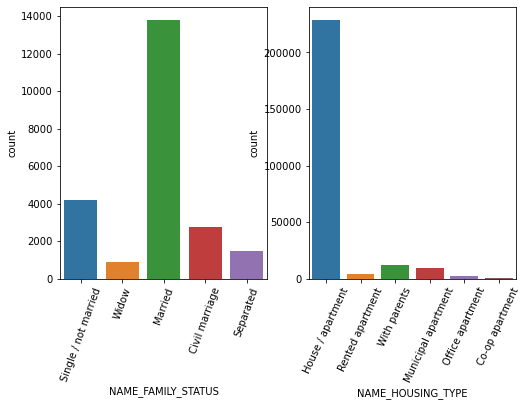

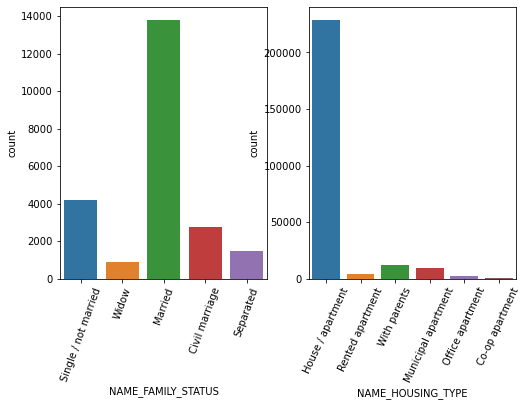

In [56]:
plt.figure(figsize=(26,5))
plt.subplot(1,6,1)
sns.countplot(x='NAME_FAMILY_STATUS',data=target1)
plt.xticks(rotation=70)
plt.subplot(1,6,2)
sns.countplot(x='NAME_HOUSING_TYPE',data=target0)
plt.xticks(rotation=65)
plt.figure(figsize=(26,5))
plt.subplot(1,6,1)
sns.countplot(x='NAME_FAMILY_STATUS',data=target1)
plt.xticks(rotation=70)
plt.subplot(1,6,2)
sns.countplot(x='NAME_HOUSING_TYPE',data=target0)
plt.xticks(rotation=65)

looks like NAME_FAMILY_STATUS and NAME_HOUSEING_TYPE doesn’t effect much on target payment

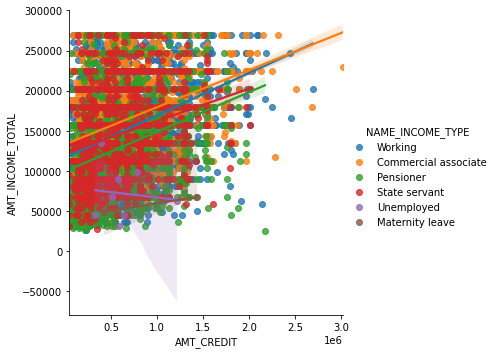

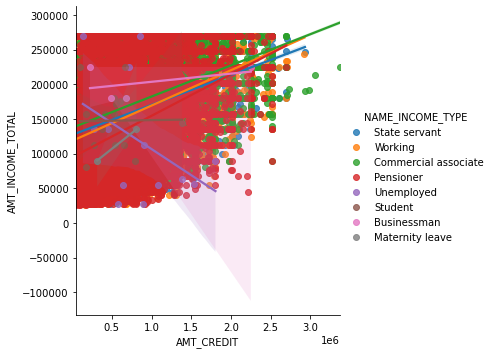

In [57]:
sns.lmplot('AMT_CREDIT','AMT_INCOME_TOTAL',data=target1,hue='NAME_INCOME_TYPE')
sns.lmplot('AMT_CREDIT','AMT_INCOME_TOTAL',data=target0,hue='NAME_INCOME_TYPE')



In [58]:
# Read previous application data
prev = pd.read_csv('C:\Users\Chandana\Documents\previous_application.csv')
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [60]:
(prev.isnull().sum() / prev.isnull().count()*100).sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

In [61]:
#drop columns with null value % grater than 45
drop_col_prev = ['RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','NAME_TYPE_SUITE','AMT_DOWN_PAYMENT','RATE_INTEREST_PRIVILEGED','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL']
prev = prev.drop(drop_col_prev, axis = 1)

In [62]:
(prev.isnull().sum() / prev.isnull().count()*100).sort_values(ascending = False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_CASH_LOAN_PURPOSE          0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_YIELD_GROUP                0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDU

In [63]:
# replaceing AMT_GOODS_PRICE null values with median
median_p=prev.AMT_GOODS_PRICE.median()
prev.AMT_GOODS_PRICE.fillna(value=median_p,inplace=True)

In [64]:
# checking for outliers
prev.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [65]:
round(prev['AMT_ANNUITY'].describe(percentiles = [0.05,.10,.15,.2,.25,.50,.75,.90,.95,.99]),2)

count    1297979.00
mean       15955.12
std        14782.14
min            0.00
5%          2726.60
10%         3817.53
15%         4597.34
20%         5463.76
25%         6321.78
50%        11250.00
75%        20658.42
90%        34703.82
95%        45336.78
99%        69685.79
max       418058.14
Name: AMT_ANNUITY, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x19d10678a90>,
 'caps': [<matplotlib.lines.Line2D at 0x19d1065ec70>,
 'boxes': [<matplotlib.lines.Line2D at 0x19d1021ffd0>],
 'medians': [<matplotlib.lines.Line2D at 0x19d101fd3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19d101fdeb0>],
 'means': []}

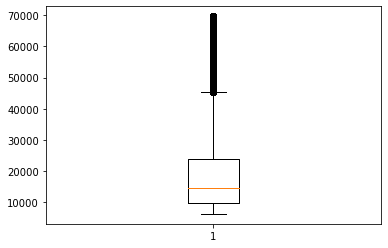

In [66]:
# removing outliers
low = prev['AMT_ANNUITY'].quantile(.25)
high = prev['AMT_ANNUITY'].quantile(.99)
prev = prev[(prev['AMT_ANNUITY']>=low) & (prev['AMT_ANNUITY']<=high)]
plt.boxplot(prev['AMT_ANNUITY'])

In [67]:
round(prev['AMT_ANNUITY'].describe(percentiles = [0.05,.10,.25,.50,.75,.90,.95,.99]),2)


count    960508.00
mean      18949.99
std       12498.57
min        6321.78
5%         6839.46
10%        7595.09
25%        9781.25
50%       14584.05
75%       24037.29
90%       37822.00
95%       46136.66
99%       60664.02
max       69685.16
Name: AMT_ANNUITY, dtype: float64

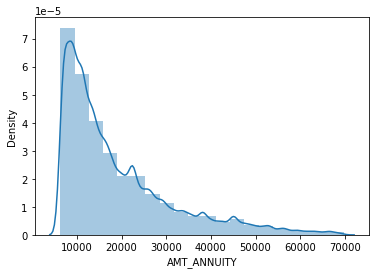

In [68]:

sns.distplot(prev.AMT_ANNUITY,bins=20)
plt.show()

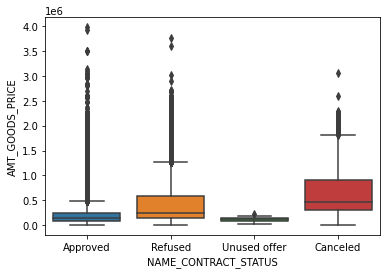

In [69]:
sns.boxplot(x="NAME_CONTRACT_STATUS",y="AMT_GOODS_PRICE",data=prev)
plt.show()

## Summery:
Goods price of good that client has higher rate of approval


In [70]:
corrprev = prev[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT','AMT_GOODS_PRICE', 'CNT_PAYMENT']].corr()
corrprev

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT
AMT_ANNUITY,1.000000,0.794300,0.808292,0.799738,0.396849
AMT_APPLICATION,0.794300,1.000000,0.965839,0.997439,0.707688
AMT_CREDIT,0.808292,0.965839,1.000000,0.976883,0.695982
AMT_GOODS_PRICE,0.799738,0.997439,0.976883,1.000000,0.697983
CNT_PAYMENT,0.396849,0.707688,0.695982,0.697983,1.000000


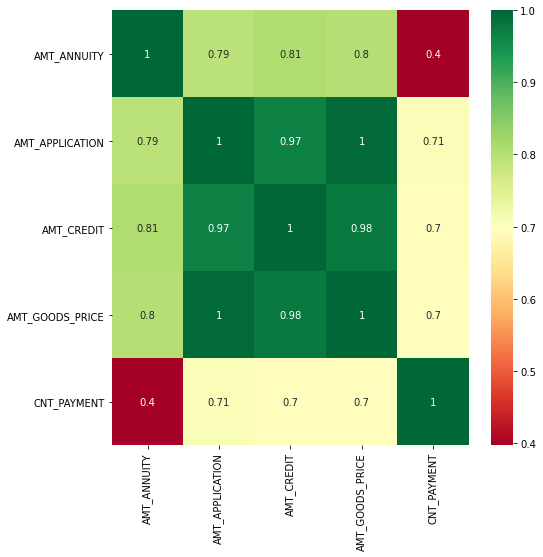

In [71]:
plt.figure(figsize=(8,8))
sns.heatmap(corrprev, annot=True,cmap="RdYlGn")
plt.show()

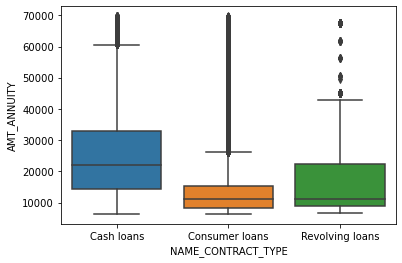

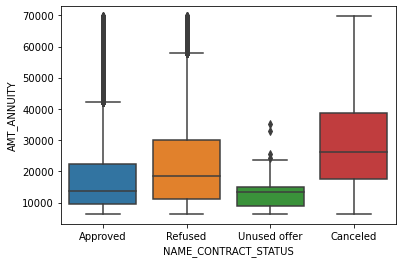

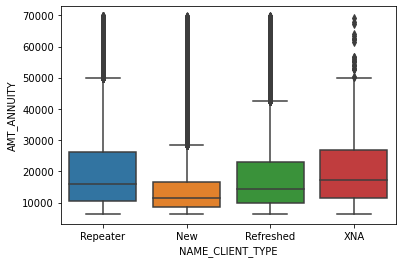

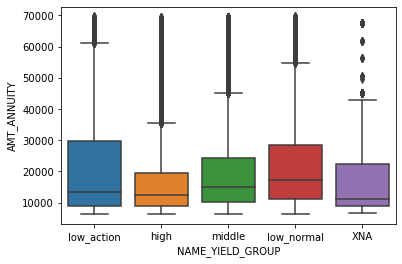

In [72]:
#AMT_ANNUITY: Loan annuity
sns.boxplot(x="NAME_CONTRACT_TYPE",y="AMT_ANNUITY",data=prev)
plt.show()
sns.boxplot(x="NAME_CONTRACT_STATUS",y="AMT_ANNUITY",data=prev)
plt.show()
sns.boxplot(x="NAME_CLIENT_TYPE",y="AMT_ANNUITY",data=prev)
plt.show()
sns.boxplot(x="NAME_YIELD_GROUP",y="AMT_ANNUITY",data=prev)
plt.show()

## Summery   
    1.on annual scale there are cash loan as main but customer loan has higher amount
    2.cancel rate of loan are comparatively higher than others

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='count'>

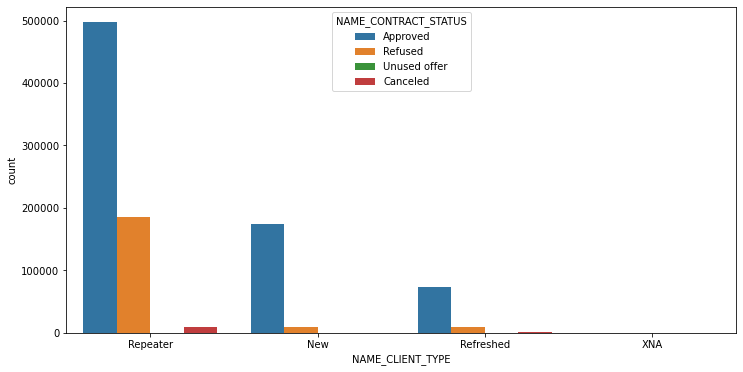

In [73]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'NAME_CLIENT_TYPE', hue = 'NAME_CONTRACT_STATUS', data = prev)

## summery
Repeter clients has higher approval rate than refused but even when compared with over all type of clients repeater clients has better approved and Refused rate when compared to other(new,refereshed,XNA)

Mearging two data frames

In [74]:
merg = pd.merge(app, prev, how='inner', on='SK_ID_CURR')
merg.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,EXPERIENCE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,1.7,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.3,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.3,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,53.0,8.3,2078043,Cash loans,24246.000,675000.0,675000.0,675000.0,THURSDAY,15,Y,1,XNA,Approved,-181,Cash through the bank,

In [75]:
merg.shape

(732423, 100)

In [76]:
merg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732423 entries, 0 to 732422
Data columns (total 100 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    732423 non-null  int64  
 1   TARGET                        732423 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          732423 non-null  object 
 3   CODE_GENDER                   732423 non-null  object 
 4   FLAG_OWN_CAR                  732423 non-null  object 
 5   FLAG_OWN_REALTY               732423 non-null  object 
 6   CNT_CHILDREN                  732423 non-null  int64  
 7   AMT_INCOME_TOTAL              732423 non-null  float64
 8   AMT_CREDIT_x                  732423 non-null  float64
 9   AMT_ANNUITY_x                 732383 non-null  float64
 10  AMT_GOODS_PRICE_x             731691 non-null  float64
 11  NAME_TYPE_SUITE               730590 non-null  object 
 12  NAME_INCOME_TYPE              732423 non-nu

In [77]:
T0 = merg[merg['TARGET']==0] 
T1 = merg[merg['TARGET']==1] 

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

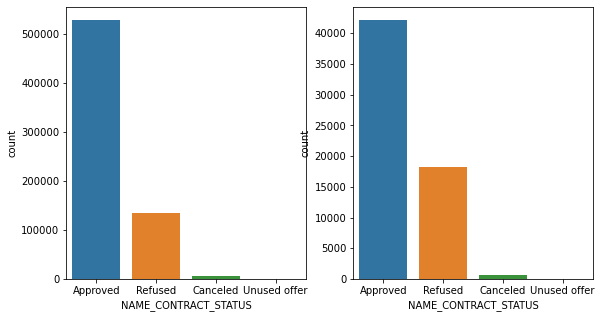

In [78]:
plt.figure(figsize=(30,5))
plt.subplot(1,6,1)
sns.countplot(x='NAME_CONTRACT_STATUS',data=T0)
plt.subplot(1,6,2)
sns.countplot(x='NAME_CONTRACT_STATUS',data=T1)

## Summery:
applications rejected had same percentage for paying on time and defected 


defective clients with approvel has lower

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='count'>

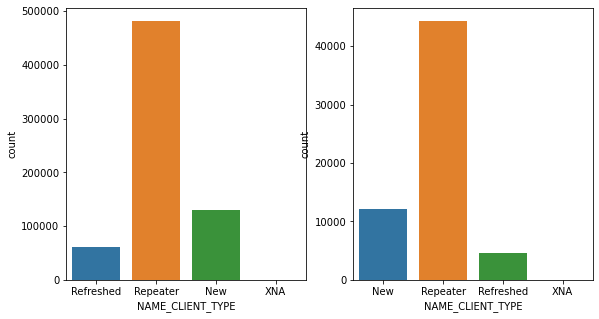

In [79]:
plt.figure(figsize=(30,5))
plt.subplot(1,6,1)
sns.countplot(x='NAME_CLIENT_TYPE',data=T0)
plt.subplot(1,6,2)
sns.countplot(x='NAME_CLIENT_TYPE',data=T1)

<AxesSubplot:xlabel='NAME_YIELD_GROUP', ylabel='count'>

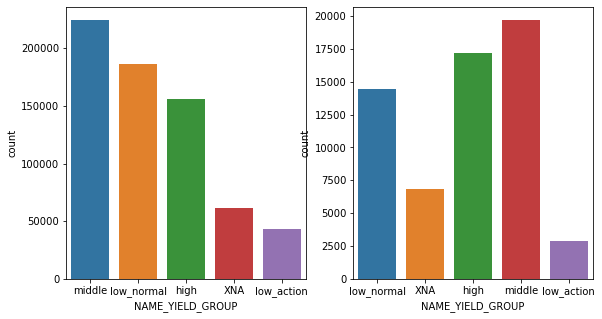

In [80]:
plt.figure(figsize=(30,5))
plt.subplot(1,6,1)
sns.countplot(x='NAME_YIELD_GROUP',data=T0)
plt.subplot(1,6,2)
sns.countplot(x='NAME_YIELD_GROUP',data=T1)


## Summery:
Intrest with low_normal are little high being defect 

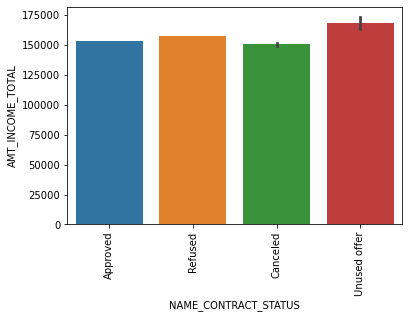

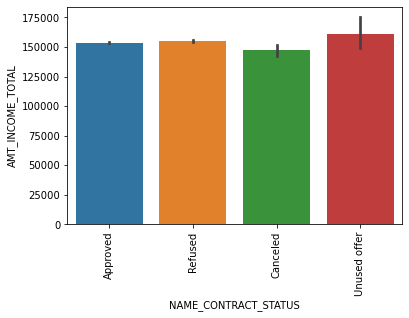

In [81]:
sns.barplot(x=T0.NAME_CONTRACT_STATUS,y=T0.AMT_INCOME_TOTAL)
plt.xticks(rotation=90)
plt.show()
sns.barplot(x=T1.NAME_CONTRACT_STATUS,y=T1.AMT_INCOME_TOTAL)
plt.xticks(rotation=90)
plt.show()

## Summery:
clints who have not used offer earlier have defaulted even when there average income is higher than others